In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
data=pd.read_csv('car_prediction_data.csv')
print(data.head())
print(data.columns)

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [29]:
x=data[['Car_Name', 'Year', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y=data['Selling_Price']
x = pd.get_dummies(x)  # converts text to 0/1 columns


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LR=LinearRegression()
RFG=RandomForestRegressor(n_jobs=-1)
GBR=GradientBoostingRegressor()
for i in [LR,RFG,GBR]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    r2=r2_score(y_test,y_pred)
    print(i,r2)


LinearRegression() 0.9007114259552926
RandomForestRegressor(n_jobs=-1) 0.9609963264204184
GradientBoostingRegressor() 0.9635365256006331


In [31]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.9677863556140721


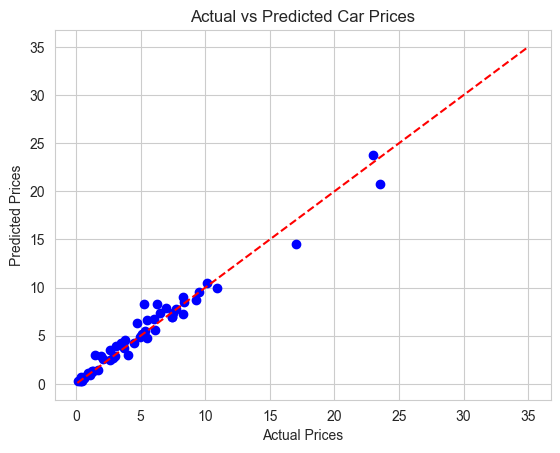

In [32]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()